**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)

In [78]:
import pandas as pd
#Observar la estructura del DataFrame
csv_path = 'LaqnData.csv'
air_df = pd.read_csv(csv_path) #Llamar csv

In [79]:
air_df.shape #Tamaño del DataFrame

(43800, 6)

In [80]:
air_df.columns #Etiquetas de las columnas del DataFrame


Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [81]:
air_df.head() #Head del DataFrame

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [82]:
air_df.tail() #Tail del Dataframe

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [83]:
air_df.dtypes #Tipo de dato para cada columna del DataFrame

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

*   Calcula el porcentaje de valores faltantes por columna.

In [84]:
# Calcula el número de valores faltantes por cada columna
miss_values_count = air_df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
miss_values_count

Value    3230
dtype: int64

In [85]:
#Calcula el porcentaje de valores faltantes por cada columna
percentage =  (miss_values_count / len(air_df)) * 100
percentage

Value    7.374429
dtype: float64

<span style="color: #FF8C00;">_Se obtiene un porcenetaje de valores faltantes de 7.37% en la columna de `Value`._</span>

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:

In [86]:
# Cantidad de valores únicos por columna
unique_values = air_df.nunique()
unique_values

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

*   ¿Cuántas mediciones se hicieron?

In [87]:
# Eliminar filas con al menos un valor faltante del DataFrame
air_df = air_df.dropna()
air_df.shape #Tamaño del DataFrame

(40570, 6)

In [88]:
#Número de mediciones
measurements_count = len(air_df)
measurements_count

40570

<span style="color: #FF8C00;">_Suponiendo que al tener un valor faltante en la columna de `Value` no se cuenta como el haber hecho una medición; aun así, contando valores duplicados, se realizaron 40570 mediciones._</span>

In [89]:
# Cantidad de valores únicos en la columna Value
unique_values_value = air_df['Value'].nunique()
unique_values_value

1847

<span style="color: #FF8C00;">_Dentro de esas 40570, se realizaron 1847 mediciones de manera única._</span>

*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

In [90]:
# Cantidad de valores únicos en la columna Species
unique_values_species = air_df['Species'].nunique()
unique_values_species

5

<span style="color: #FF8C00;">_Se analizaron 5 contaminantes del aire._</span>

*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

<span style="color: #FF8C00;">_De acuerdo a `nunique()`, las columnas `Site` y `Provisional or Ratified` tienen el mismo valor en todo el conjunto de datos._</span>

In [91]:
#Eliminar columnas Site y Provisional or Ratified
air_df = air_df.drop(columns=['Site', 'Provisional or Ratified'])
air_df.columns #Etiquetas de las columnas del DataFrame

Index(['Species', 'ReadingDateTime', 'Value', 'Units'], dtype='object')

*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [92]:
unique_verified_units=air_df['Units'].unique()
unique_verified_units

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [93]:
# Cantidad de valores únicos en la columna Units
unique_values_units= air_df['Units'].nunique()
unique_values_units

3

In [94]:
#Eliminar columna Units
air_df = air_df.drop(columns=['Units'])
air_df.columns #Etiquetas de las columnas del DataFrame

Index(['Species', 'ReadingDateTime', 'Value'], dtype='object')

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [95]:
#Conteo de valores por categoría para la columna Species
count_category=air_df['Species'].value_counts()
count_category

Species
NO       8660
NO2      8660
NOX      8660
PM10     8657
PM2.5    5933
Name: count, dtype: int64

In [96]:
#Número de categorías diferentes
len(count_category)

5

<span style="color: #FF8C00;">_Si coincide que hay 5 valores para la columna `Species`._</span>

In [97]:
#Conteo Total de Mediciones
cumulative_count = count_category.sum()
print(cumulative_count)

40570


<span style="color: #FF8C00;">_Si coincide que hay 40570 mediciones en total._</span>

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [98]:
# Calcular el promedio de Value para cada categoría de Species
average_values = air_df.groupby('Species')['Value'].mean()
#Mostrar Encabezados
average_values_df = average_values.reset_index()
average_values_df.columns = ['Species', 'Average Value']
average_values_df

,Species,Average Value
0,NO,15.045115
1,NO2,38.010185
2,NOX,61.078661
3,PM10,22.551704
4,PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [99]:
# Usar pivot_table si hay duplicados se toma promedio
pvt_df = air_df.pivot_table(index='ReadingDateTime', columns='Species', values='Value', aggfunc='mean')
pvt_df.head()

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

In [100]:
pvt_df['NO2'].describe().T

count    8660.000000
mean       38.010185
std        18.580841
min         2.800000
25%        23.800000
50%        35.300000
75%        49.900000
max       120.200000
Name: NO2, dtype: float64

In [101]:
#Calcular mayor valor para NO2
max_NO2 = pvt_df['NO2'].max()
print(max_NO2)

120.2


In [102]:
#Ver a que dia pertenece
day_max_NO2 = pvt_df['NO2'].idxmax()
day_max_NO2

'24/01/2017 19:00'

In [103]:
#Revisar
date_check_NO2 = pvt_df.loc['24/01/2017 19:00']
print(date_check_NO2['NO2'])

120.2


<span style="color: #FF8C00;">_El mayor valor de `NO2` registrado es de 120.2 ug m-3, y se realizó el día 24/01/2017 19:00._</span>

*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?

In [104]:
pvt_df['PM10'].describe().T

count    8657.000000
mean       22.551704
std        15.344755
min        -5.600000
25%        13.900000
50%        19.500000
75%        27.300000
max       633.099980
Name: PM10, dtype: float64

In [105]:
#Calcular menor valor para PM10
min_PM10 = pvt_df['PM10'].min()
print(min_PM10)

-5.6


In [106]:
#Ver a que dia pertenece
day_min_PM10 = pvt_df['PM10'].idxmin()
day_min_PM10

'12/09/2017 23:00'

In [107]:
#Revisar
date_check_PM10 = pvt_df.loc['12/09/2017 23:00']
print(date_check_PM10['PM10'])

-5.6


<span style="color: #FF8C00;">_El menor valor de `PM10` registrado es de -5.6 ug m-3, y se realizó el día 12/09/2017 23:00._</span>

*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?

In [108]:
pvt_df['NO'].describe().T

count    8660.000000
mean       15.045115
std        26.678565
min        -2.000000
25%         3.100000
50%         7.100000
75%        15.500000
max       401.799990
Name: NO, dtype: float64

In [109]:
median_NO = pvt_df['NO'].median()
print(median_NO)

7.1


<span style="color: #FF8C00;">_En un set de valores ordenados, la mediana es el valor que se encuentra en el centro de la distribución de los datos, otra forma de nombrarla es como el segundo cuartil de los datos. Por lo que una mediana de `NO` de 7.1 ug m-3 representa el valor central en la distribución de la concentración de este contaminante. A partir de este dato se pueden obtener valores atípicos dentro de la distribución._</span>

*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [110]:
pvt_df['PM2.5'].describe().T

count    5933.000000
mean       14.999831
std        13.558588
min        -8.000000
25%         7.000000
50%        11.000000
75%        18.000000
max       128.000000
Name: PM2.5, dtype: float64

In [111]:
first_quartile_PM2_5 = pvt_df['PM2.5'].quantile(0.25)
print(first_quartile_PM2_5)

7.0


<span style="color: #FF8C00;">_El primer cuartil de un set de datos es un valor estadístico que divide el 25% inferior de un conjunto de datos ordenados. Es decir, si el primer cuartil de la concentración de `PM2.5` es de 7.0 ug m-3, esto significa que el 25% de los datos está por debajo de este valor, y el 75% de los datos está por encima de él._</span>

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

<span style="color: #FF8C00;">_Sin `matplotlib`:_</span>

array([[<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'NOX'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

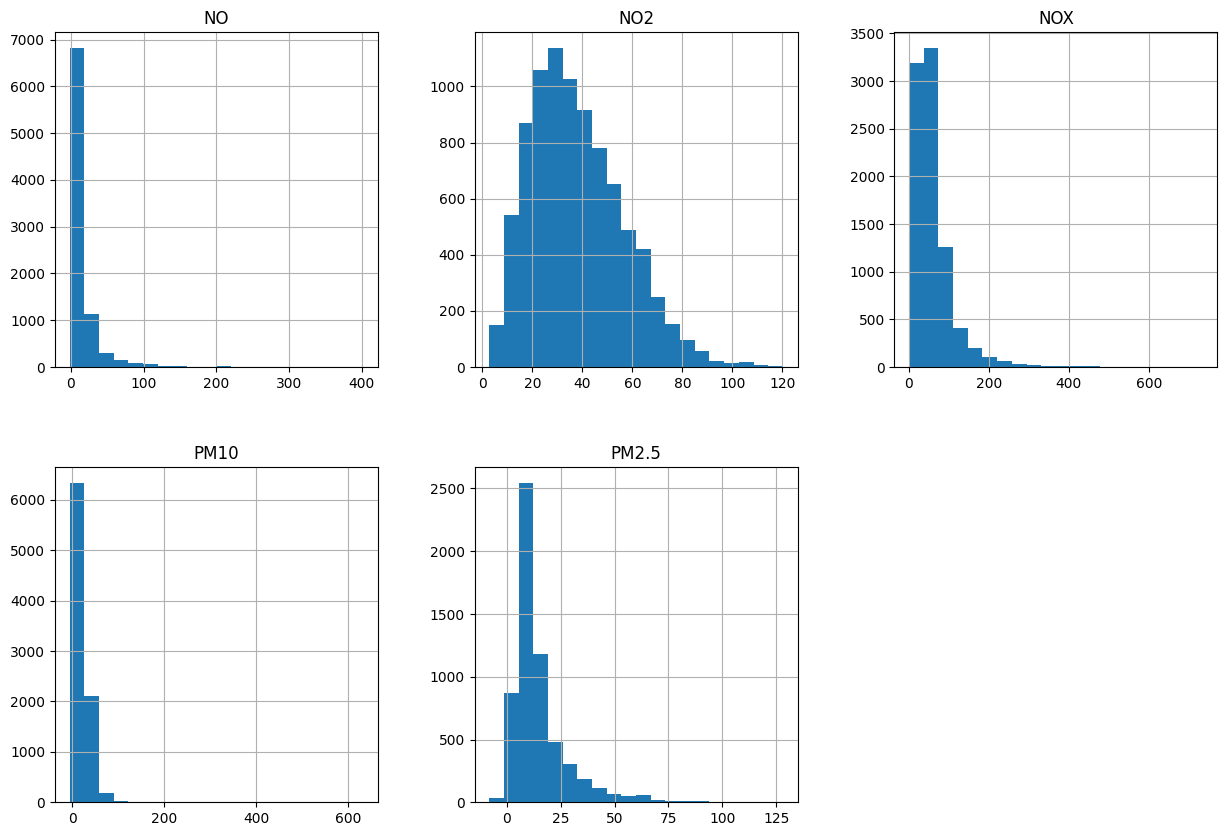

In [112]:
# Dibujar histogramas para cada columna de pvt_df
pvt_df.hist(bins=20, figsize=(15, 10), layout=(len(pvt_df.columns)//3 + 1, 3))

<span style="color: #FF8C00;">_Con `matplotlib` para agregar labels:_</span>

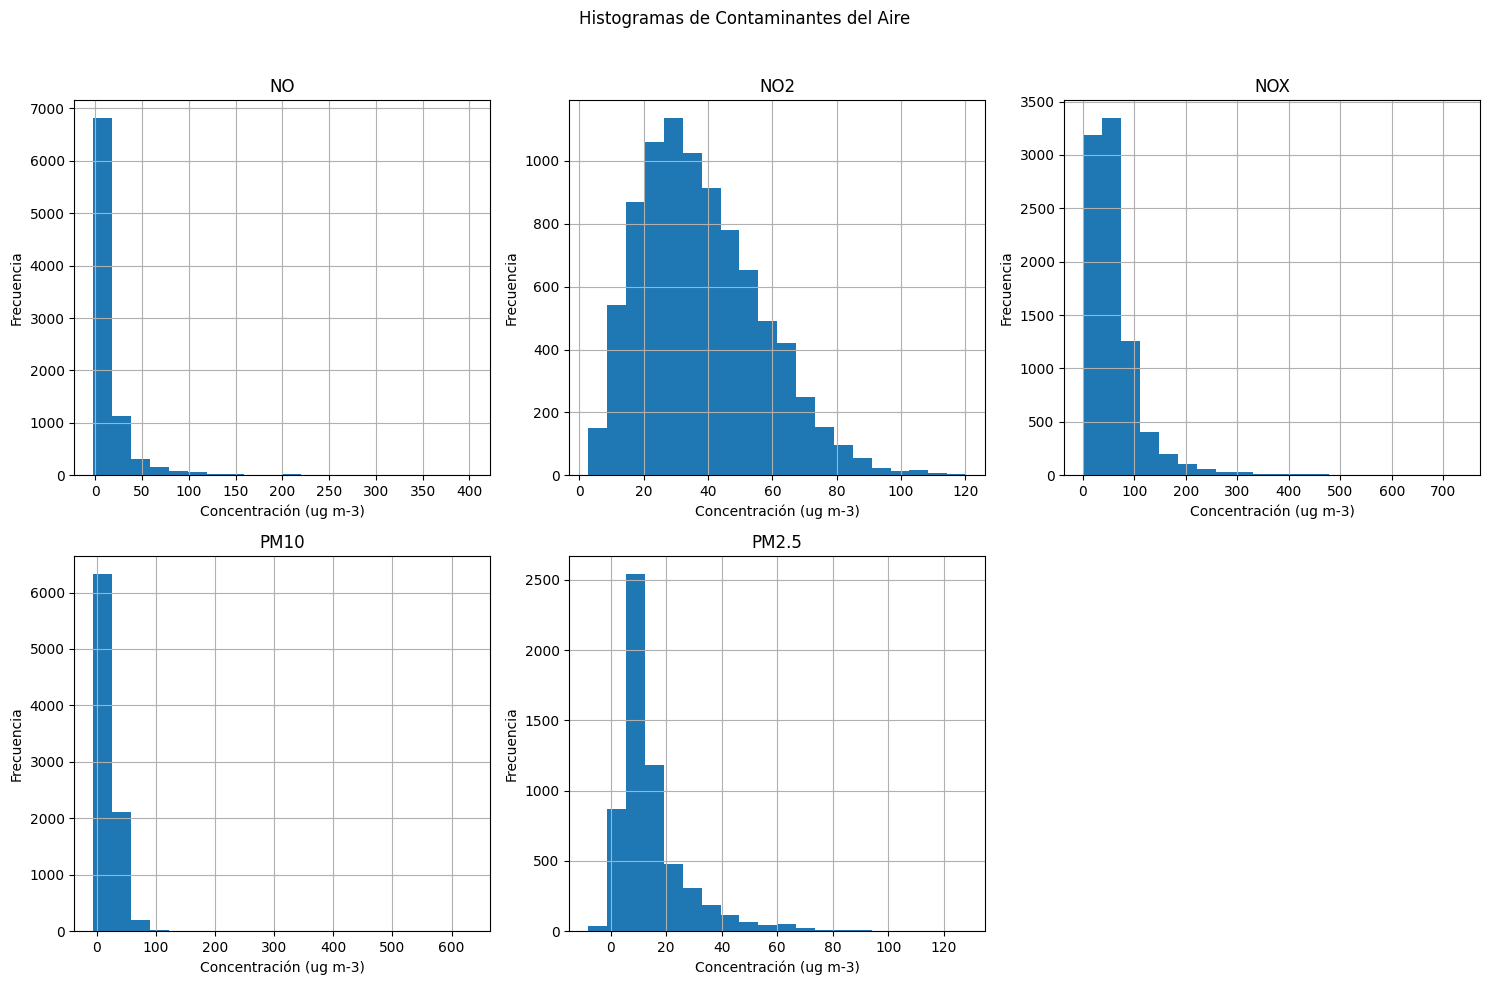

In [113]:
import matplotlib.pyplot as plt

# Dibujar histogramas para cada columna de pvt_df
pvt_df.hist(bins=20, figsize=(15, 10), layout=(len(pvt_df.columns)//3 + 1, 3))
plt.suptitle('Histogramas de Contaminantes del Aire')

# Agregar etiquetas a los ejes
for ax, col in zip(plt.gcf().axes, pvt_df.columns):
    ax.set_title(col)  # Poner el nombre de la columna como título del histograma
    ax.set_xlabel('Concentración (ug m-3)')  # Etiqueta del eje x
    ax.set_ylabel('Frecuencia')     # Etiqueta del eje y

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<span style="color: #FF8C00;">_El `NO2` tiene mayor variabilidad en los datos._</span>

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

<span style="color: #FF8C00;">_Esta primer parte del codigo divide la columna `ReadingDateTime` del DataFrame `air_df` en fecha y hora usando el comando `.str.split()` con el espacio como separador para indicar lo que debe ser separado y coloca las nuevas partes en columnas independientes. De la misma manera se renombran las dos nuevas columnas como `Date` y `Time` con el comando `.columns`_.</span>

In [114]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df


,Date,Time
0,01/01/2017,00:00
1,01/01/2017,01:00
2,01/01/2017,02:00
3,01/01/2017,03:00
4,01/01/2017,04:00
...,...,...
43795,31/12/2017,19:00
43796,31/12/2017,20:00
43797,31/12/2017,21:00
43798,31/12/2017,22:00


<span style="color: #FF8C00;">_Esta segunda parte del codigo es similar a la primera, ya que divide la columna `Date` del DataFrame `datetime_df` en día, mes y año usando el comando `.str.split()` con el `/` como separador y coloca las partes en columnas separadas. De la misma manera se renombran las tres nuevas columnas con el comando `.columns` como `Day`, `Month` y `Year`._</span>

In [115]:
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df

,Day,Month,Year
0,01,01,2017
1,01,01,2017
2,01,01,2017
3,01,01,2017
4,01,01,2017
...,...,...,...
43795,31,12,2017
43796,31,12,2017
43797,31,12,2017
43798,31,12,2017


<span style="color: #FF8C00;">_Esta nueva línea de código une el DataFrame `air_df` con `date_df` y agrega la solamente la columna `Time` de `datetime_df` con el comando `.join()`. De la misma manera, con el comando `.drop` se eliminan las columnas `ReadingDateTime` y `Year` del nuevo DataFrame. Finalmente, nombra las columnas `Month`, `Day`, `Time`, y `Species` como nuevo índice del DataFrame con el comando `.set_index`._</span>

In [116]:
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[40570 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [117]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8737 rows x 5 columns]

<span style="color: #FF8C00;">_Las salidas entre el código de la pregunta 8 y 9 definititvamente no son iguales. Si bien en el ejercicio 8 se muestran todas las mediciones de `Species` en formato fila, en el ejercicio 9 se muestran en columnas, mostrando el mismo número de datos, solo que de una manera bastante diferente. En mi opinión, la manera de visualizar del ejercicio 9 muestra más información ya que muestra el `Value` para cada hora de cada contaminante, no así en el código del ejercicio 8 que se muestra en un formato donde hay que buscar especificamente el `Value` para cada hora de cada contaminante medido._</span>

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

*   <span style="color: #FF8C00;">    _Similitudes._</span>

<span style="color: #FF8C00;">    _La similitud más importante entre ambos pares de comandos es que permiten cambiar DataFrames entre formatos largo y ancho, a la vez que ambos pares pertenecen a la paquetería de Pandas._</span>

*   <span style="color: #FF8C00;">    _Diferencias._</span>

<span style="color: #FF8C00;">    _El par `stack()/unstack()` pueden manejar objetos con índices múltiples, por otro lado, el par `melt()/pivot()` es más general con los objetos en los que trabaja; es decir, son más comúnmente usados para transformar DataFrames en datos "planos" sin índices jerárquicos. Este segundo par funciona en datos donde hay una columna como variable de identificación, mientras que las otras columnas son variables medidas. Si bien, el resultado del par `stack()/unstack()` es un DataFrame con índices múltiples, con el par `melt()/pivot()` se obtiene un resultado de solo dos columnas, una con la 'variable' y otra solo con el 'valor' asociado a la variable._</span>

<span style="color: #FF8C00;">    _Finalmente, la contraparte para `melt()` es `stack()` ya que ambos transforman datos de ancho a largo. Elegir entre ambas depende mucho del contexto y de los tipos de datos con los que se trabaje, aún así considero que en análisis como los hechos en el presente `stack()` es más útil que `melt()` por el hecho de trabajar con índices múltiples y su forma de arrojar el resultado. Sin embargo, en caso de querer analizar datos planos, donde sólo hay una columna de identificación y otra de medida, también es posible utilizar `melt()`._</span>